 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline
sns.set_theme(style="darkgrid")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_file = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Review remaining statiscal data
whale_df.describe(include="all")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [6]:
# Sort the whale dataframe for further analysis
whale_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_file = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
# Review remaining statiscal data
algo_df.describe(include="all")

,Algo 1,Algo 2
count,1235.000000,1235.000000
mean,0.000654,0.000341
std,0.007988,0.008466
min,-0.030951,-0.036937
25%,-0.003252,-0.003733
50%,0.000094,0.000581
75%,0.003901,0.005194
max,0.098246,0.083734


In [11]:
# Sort the algorithmic dataframe for future analysis
algo_df.sort_index()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_file = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype(float)
sp500_df.dtypes

/home/gadam/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [15]:
sp500_df.sort_index()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [16]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

In [17]:
# Drop nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [18]:
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "SP500_Close"})
sp500_daily_returns.sort_index()

,SP500_Close
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469
...,...
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
combined_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

In [21]:
# Remove new null data for a clean dataframe
combined_portfolio_df = combined_portfolio_df.dropna()
combined_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

In [22]:
# Sort the portfolio dataframe for future analysis
combined_portfolio_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

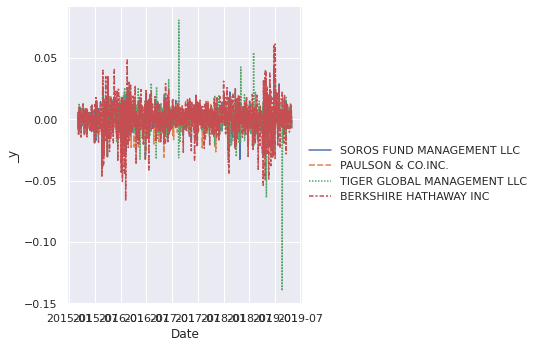

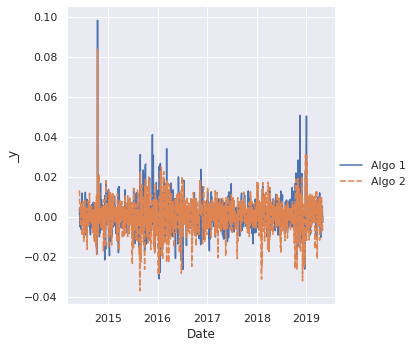

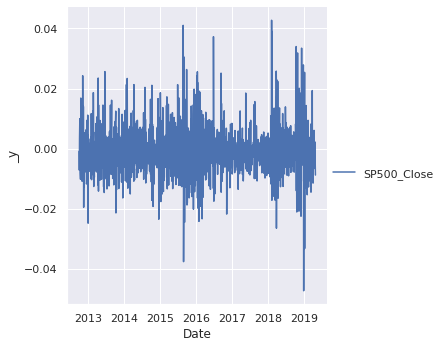

In [23]:
# Plot daily returns of all portfolios

# [df.plot(figsize=(7,6), title="Daily Returns") for df in [whale_df, algo_df, sp500_daily_returns]]
[sns.relplot(data=df, kind="line") for df in [whale_df, algo_df, sp500_daily_returns]]

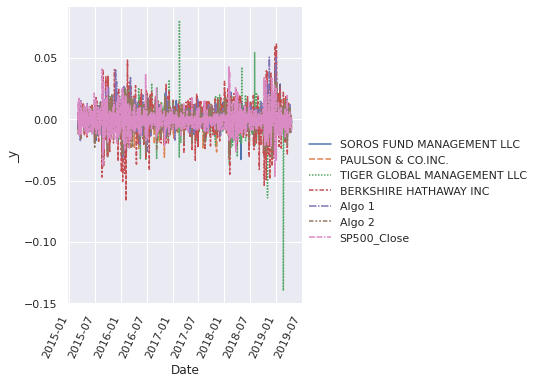

In [24]:
# Plot the combined portfolion retrns dataframe
combined_chart = sns.relplot(data=combined_portfolio_df, kind="line")
combined_chart.set_xticklabels(rotation=65, horizontalalignment="right")

#### Calculate and Plot cumulative returns.

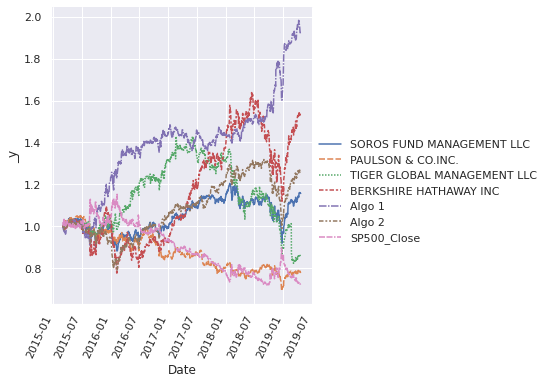

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolio_df).cumprod()

# Plot cumulative returns
cumulative_chart = sns.relplot(data=cumulative_returns, kind="line")
cumulative_chart.set_xticklabels(rotation=65, horizontalalignment="right")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


[Text(0, 0, 'SOROS FUND MANAGEMENT LLC'),
 Text(1, 0, 'PAULSON & CO.INC. '),
 Text(2, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
 Text(3, 0, 'BERKSHIRE HATHAWAY INC')]

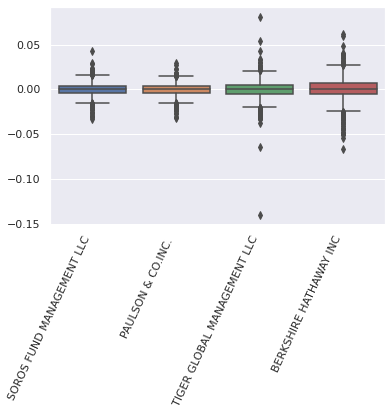

In [26]:
# Box plot to visually show risk
whale_box_chart = sns.boxplot(data=whale_df)
whale_box_chart.set_xticklabels(whale_box_chart.get_xticklabels(), rotation=65, horizontalalignment="right")

[Text(0, 0, 'Algo 1'), Text(1, 0, 'Algo 2')]

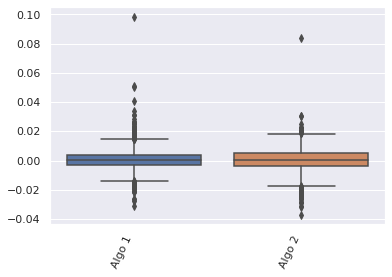

In [27]:
algo_box_chart = sns.boxplot(data=algo_df)
algo_box_chart.set_xticklabels(algo_box_chart.get_xticklabels(), rotation=65, horizontalalignment="right")

<AxesSubplot:>

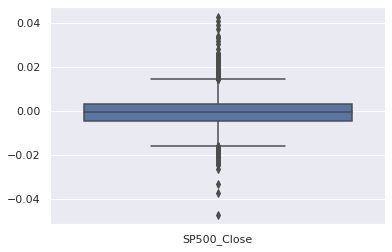

In [28]:
sns.boxplot(data=sp500_daily_returns)

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios

# Starting with the whale portfolio, I'll calculate the portfolio's returns with an equal amount (25%) in each fund
whale_weights = [0.25, 0.25, 0.25, 0.25]
whale_weighted_returns = whale_df.dot(whale_weights)
whale_weighted_returns.head()

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
dtype: float64

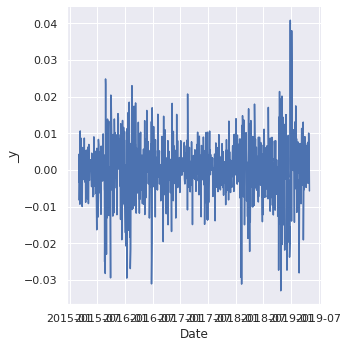

In [30]:
# Plot the weighted whale returns
sns.relplot(data=whale_weighted_returns, kind="line")

In [31]:
# Now calculate the standard deviation from the weighted returns dataframe
whale_std = whale_weighted_returns.std()
whale_std

0.007894995212497506

In [32]:
# The algorithmic portfolio will also use a weighted returns calculation
algo_weights = [0.5, 0.5]
algo_weighted_returns = algo_df.dot(algo_weights)
algo_weighted_returns

Date
2014-06-05    0.008674
2014-06-06    0.005070
2014-06-09    0.000328
2014-06-10    0.001835
2014-06-11    0.000499
                ...   
2019-04-25   -0.003282
2019-04-26    0.004118
2019-04-29    0.004019
2019-04-30   -0.002257
2019-05-01   -0.003632
Length: 1235, dtype: float64

In [33]:
# Calculate the standard deviation from algo's weighted returns
algo_std = algo_weighted_returns.std()
algo_std

0.006752030964420841

In [34]:
# now calculate the S&P 500's standard deviation
sp500_std = sp500_daily_returns.std()
sp500_std

SP500_Close    0.008135
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [35]:
# Determine which portfolios are riskier than the S&P 500
whale_sd = round(whale_std, 4)
algo_sd = round(algo_std, 4)
sp500_sd = round(sp500_std['SP500_Close'], 4)
adverb = False  # This is only used for printing the adverb "also" in the final `if` condition
if (sp500_sd > whale_sd) and (sp500_sd > algo_sd):
    print(f"With standard deviations of {whale_sd} and {algo_sd} respectively, both the whale and algorithmic portfolios are less risky than the S&P 500 at a standdard deviation of {sp500_sd}.")
if whale_sd > sp500_sd:
    print(f"With a standard deviation of {whale_sd}, the whale portfolio is riskier than the S&P 500 at a standard deviation of {sp500_sd}.")
    adverb = True
if algo_sd > sp500_sd:
    print(f"With a standard deviation of {algo_sd}, the algorithmic portfolio is {'also ' if adverb else ''}riskier than the S&P 500 at a standard deviation of {sp500_sd}.")


With standard deviations of 0.0079 and 0.0068 respectively, both the whale and algorithmic portfolios are less risky than the S&P 500 at a standdard deviation of 0.0081.


### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized standard deviation (252 trading days)
whale_volatility = whale_std * np.sqrt(252)
algo_volatility = algo_std * np.sqrt(252)
sp500_volatility = sp500_std * np.sqrt(252)

In [37]:
whale_volatility

0.12532916360588367

In [38]:
algo_volatility

0.10718516865879092

In [39]:
sp500_volatility

SP500_Close    0.129133
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

Text(0.5, 1.0, '21-Day Rolling Standard Deviation')

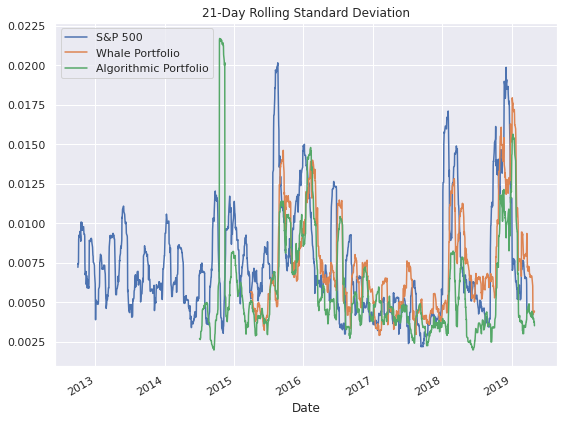

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
from matplotlib.figure import figaspect


whale_rolling_sd = whale_weighted_returns.rolling(21).std()
algo_rolling_sd = algo_weighted_returns.rolling(21).std()
sp500_rolling_sd = sp500_daily_returns.rolling(21).std()

# Plot the rolling standard deviation, overlaying each on the same chart and add a legend
sp500_ax = sp500_rolling_sd.plot()
whale_ax = whale_rolling_sd.plot(ax=sp500_ax)
algo_ax = algo_rolling_sd.plot(ax=whale_ax, figsize=(9,7))
algo_ax.legend(["S&P 500", "Whale Portfolio", "Algorithmic Portfolio"])
algo_ax.set_title("21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!